In [24]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [25]:
data_folder = "../data/columncompression20210225/multithreaded"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("","")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
high_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
high_level = high_level.sort_values("num_clients")
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,codec_name,num_clients
9,./tpch_bitpacking_compactvector_14_shuffled.json,1.927148e+09,0.327872,bitpacking_compactvector_14_shuffled,bitpacking_compactvector,14
1,./tpch_bitpacking_compactvector_f_14_shuffled....,1.916942e+09,0.330039,bitpacking_compactvector_16_14_shuffled,bitpacking_compactvector_16,14
10,./tpch_bitpacking_simdcai_14_shuffled.json,2.231152e+09,0.283073,for_SIMDCAI_simd_14_shuffled,for_SIMDCAI_simd,14
14,./tpch_bitpacking_simdcai_seq_14_shuffled.json,2.437344e+09,0.259306,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14
8,./tpch_bitpacking_turbopfor_14_shuffled.json,1.917271e+09,0.329466,bitpacking_turboPFOR_14_shuffled,bitpacking_turboPFOR,14
3,./tpch_bitpacking_turbopfor_seq_14_shuffled.json,2.089494e+09,0.302277,bitpacking_turboPFOR_seq_14_shuffled,bitpacking_turboPFOR_seq,14
2,./tpch_compressionUnencoded_14_shuffled.json,1.904676e+09,0.331588,unencoded_Hyrise_14_shuffled,unencoded_Hyrise,14
5,./tpch_dictionary_14_shuffled.json,1.849876e+09,0.341751,bytepacking_Hyrise_fsba_14_shuffled,bytepacking_Hyrise_fsba,14
7,./tpch_bitpacking_compactvector_28_shuffled.json,2.797596e+09,0.450786,bitpacking_compactvector_28_shuffled,bitpacking_compactvector,28
15,./tpch_bitpacking_compactvector_f_28_shuffled....,2.770864e+09,0.455742,bitpacking_compactvector_16_28_shuffled,bitpacking_compactvector_16,28


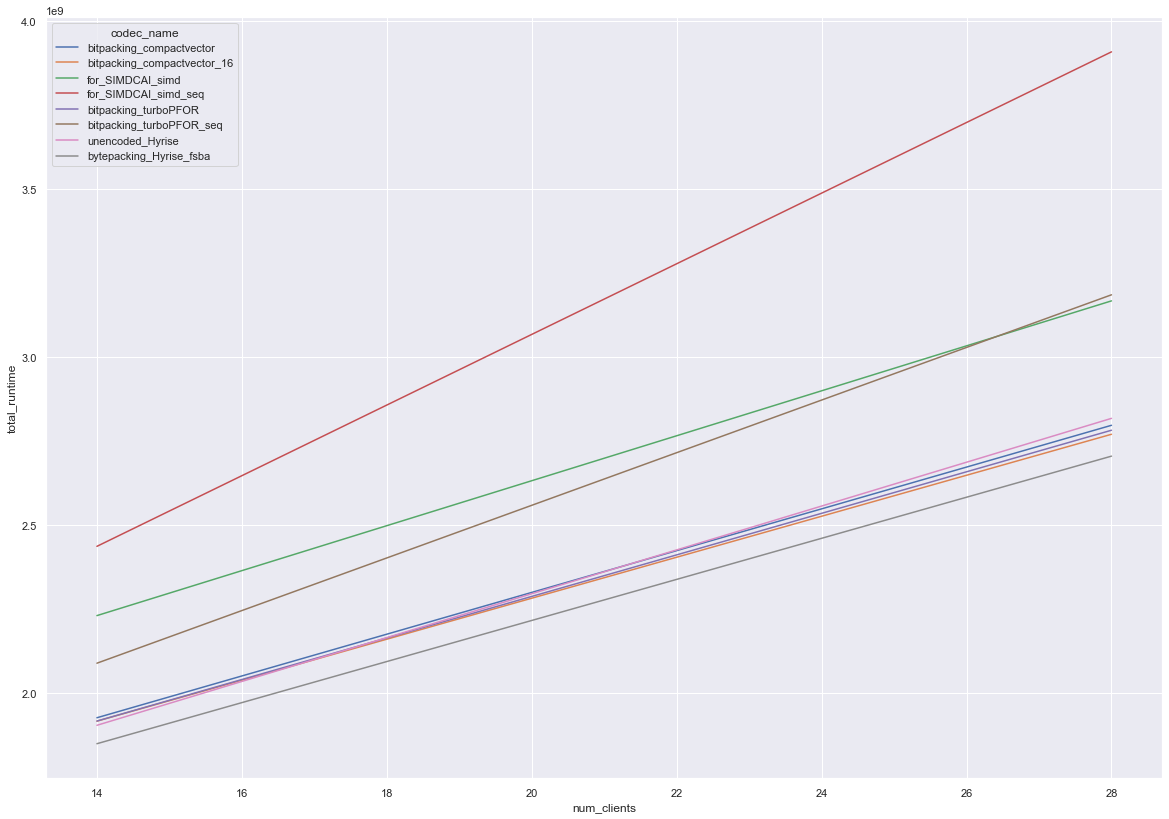

In [26]:

plot = sns.lineplot(data=high_level, x="num_clients", y="total_runtime", hue="codec_name")
plt.savefig(f"visualizations/tpch_multi_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

<AxesSubplot:xlabel='Library/Codec', ylabel='Total Runtime TPCH SF10 in ms'>

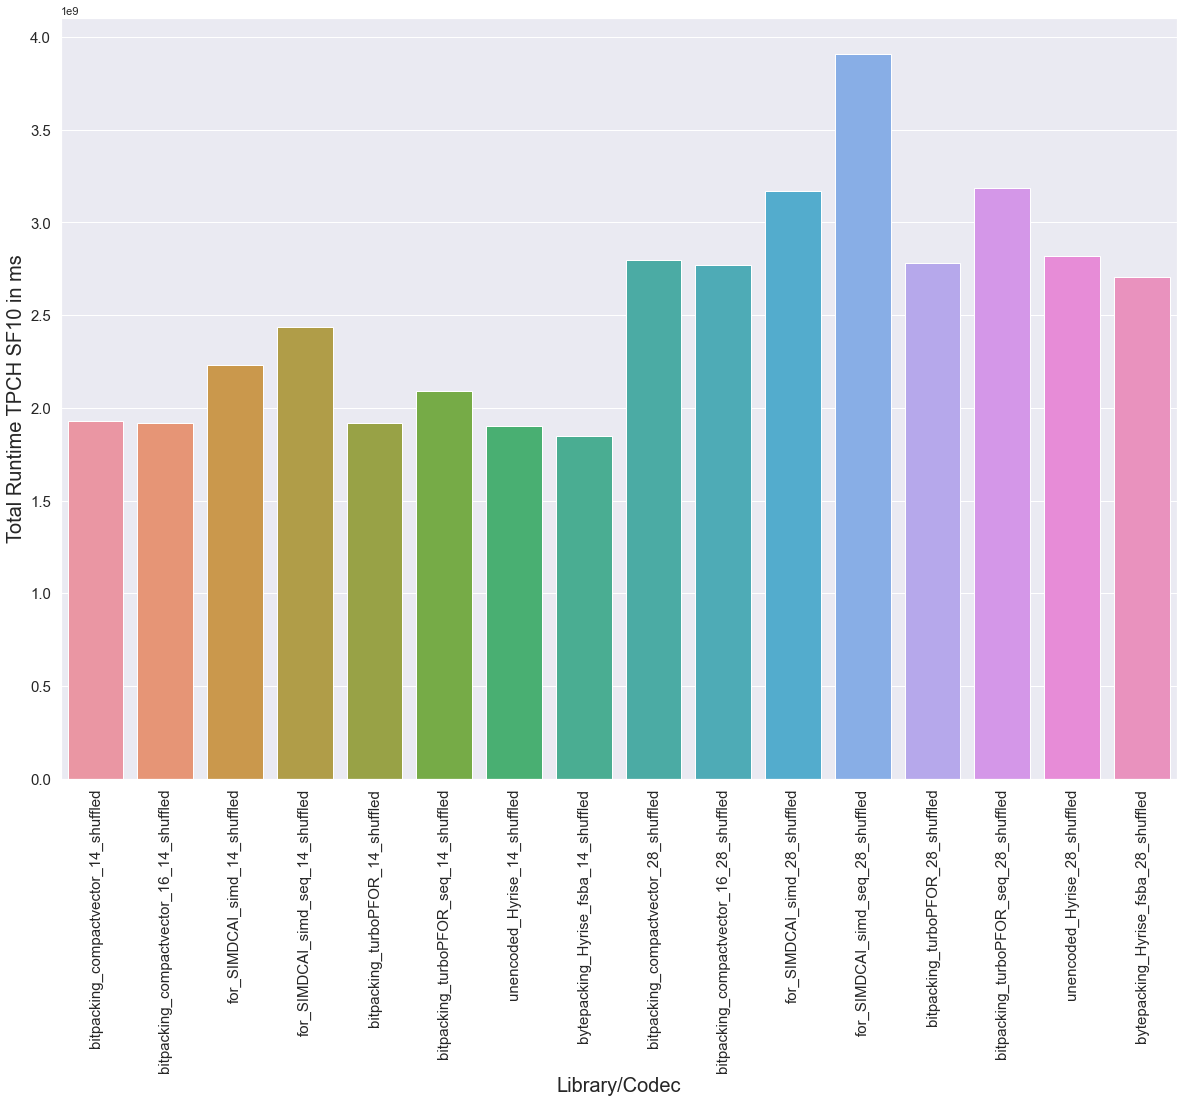

In [27]:
def plot_high_level(d, filename, plot=None):
    plt.tight_layout()
    if plot is None:
        plot = sns.barplot(data=d, x="fancy_name", y="total_runtime")
    # plot.set(ylim=(1.5 * 10**9, 2.05 * 10**9))
    plot.set_xlabel("Library/Codec",fontsize=20)
    plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20) 
    plot.tick_params(labelsize=15)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

    plt.savefig(f"visualizations/{filename}.svg", format="svg")
    return plot
plot_high_level(
    high_level,
    "tpch_multi_compression_high_level_without_lto")

In [39]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")

def fancy_query_name(q):
    return q.replace("TPC-H ", "")

low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [fancy_query_name(b) for b in low_level["query_name"]]
low_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in low_level["fancy_name"]]
low_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in low_level["fancy_name"]]

low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp).*")]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name,codec_name,num_clients
0,./tpch_bitpacking_simdcai_seq_28_shuffled.json,01,1.065515e+10,0.322343,for_SIMDCAI_simd_seq_28_shuffled,for_SIMDCAI_simd_seq,28
308,./tpch_bitpacking_simdcai_seq_14_shuffled.json,01,8.257122e+09,0.258754,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14
198,./tpch_bitpacking_compactvector_14_shuffled.json,01,6.372062e+09,0.326842,bitpacking_compactvector_14_shuffled,bitpacking_compactvector,14
264,./tpch_compressionUnencoded_28_shuffled.json,01,7.078663e+09,0.446132,unencoded_Hyrise_28_shuffled,unencoded_Hyrise,28
176,./tpch_bitpacking_turbopfor_14_shuffled.json,01,6.348637e+09,0.328361,bitpacking_turboPFOR_14_shuffled,bitpacking_turboPFOR,14
...,...,...,...,...,...,...,...
65,./tpch_compressionUnencoded_14_shuffled.json,22,3.042974e+08,0.331186,unencoded_Hyrise_14_shuffled,unencoded_Hyrise,14
43,./tpch_bitpacking_compactvector_f_14_shuffled....,22,3.384706e+08,0.329939,bitpacking_compactvector_16_14_shuffled,bitpacking_compactvector_16,14
21,./tpch_bitpacking_simdcai_seq_28_shuffled.json,22,8.024130e+08,0.323449,for_SIMDCAI_simd_seq_28_shuffled,for_SIMDCAI_simd_seq,28
329,./tpch_bitpacking_simdcai_seq_14_shuffled.json,22,4.646420e+08,0.259860,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14


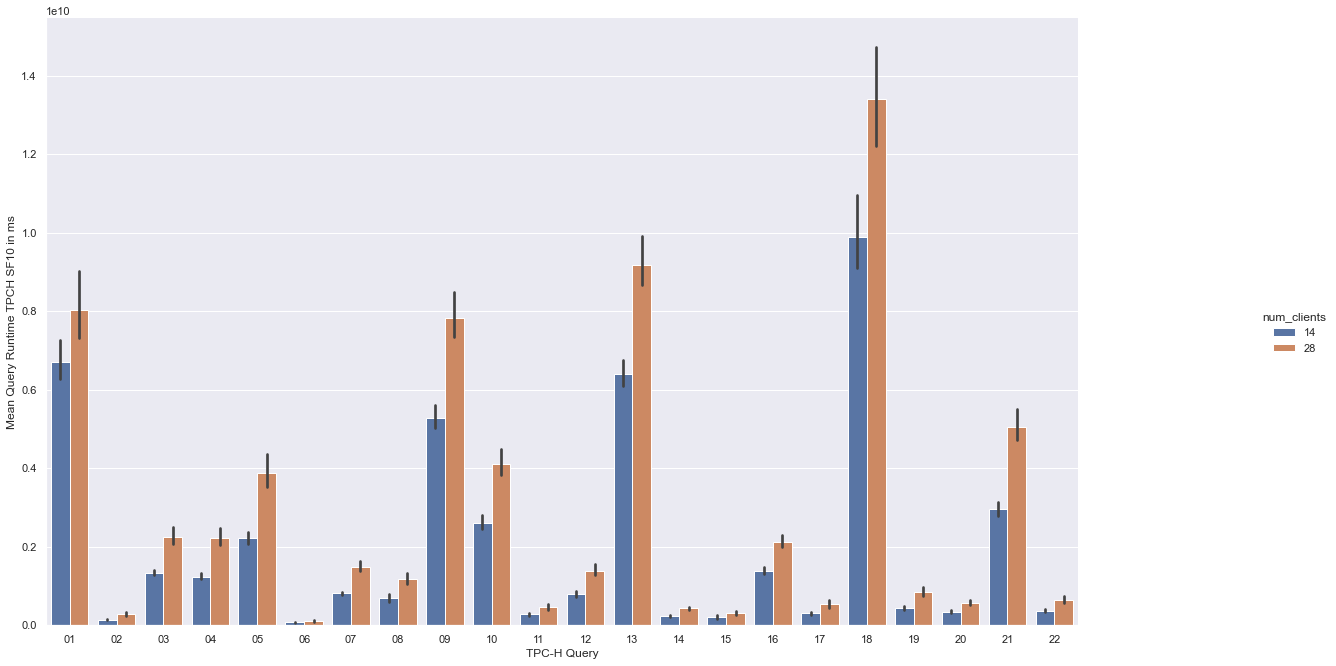

In [29]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="num_clients")
plot.set_axis_labels("TPC-H Query", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(20 ,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_absolute.svg", format="svg")

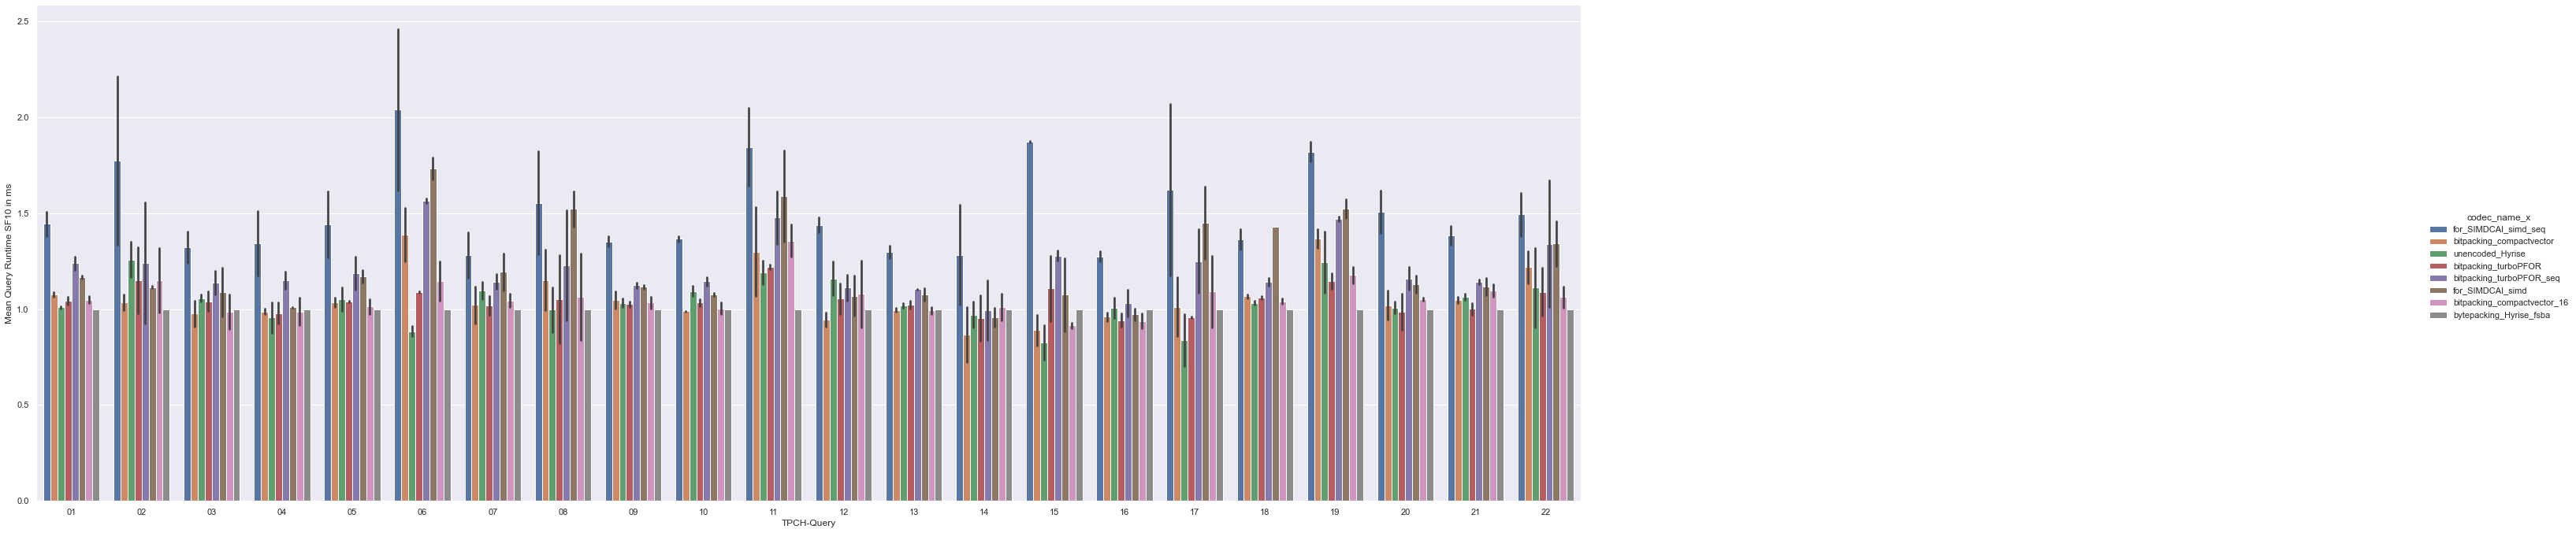

In [40]:
low_level["key"] = low_level["query_name"] + low_level["num_clients"].astype(str)
default_query_durations = low_level[low_level["codec_name"].str.match(".*fsba.*")]
merged = low_level.merge(default_query_durations, how="left", left_on="key", right_on="key")
merged["duration_percentage"] = merged["avg_duration_x"] / merged["avg_duration_y"]
filtered = merged # merged[~merged["benchmark_run_name_x"].str.match(".*(fsba|turbopfor_seq).*")]
plot = sns.catplot(data=filtered, x="query_name_x", y="duration_percentage", kind="bar", hue="codec_name_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(50,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
plt.show()


In [41]:
codec_names = filtered["codec_name_x"].unique()
codec_names.sort()
excluded = ["for_SIMDCAI_simd", "for_SIMDCAI_simd_seq", "bitpacking_turboPFOR_seq"]
codec_names = [c for c in codec_names if not c in excluded]
codec_names

['bitpacking_compactvector',
 'bitpacking_compactvector_16',
 'bitpacking_turboPFOR',
 'bytepacking_Hyrise_fsba',
 'unencoded_Hyrise']

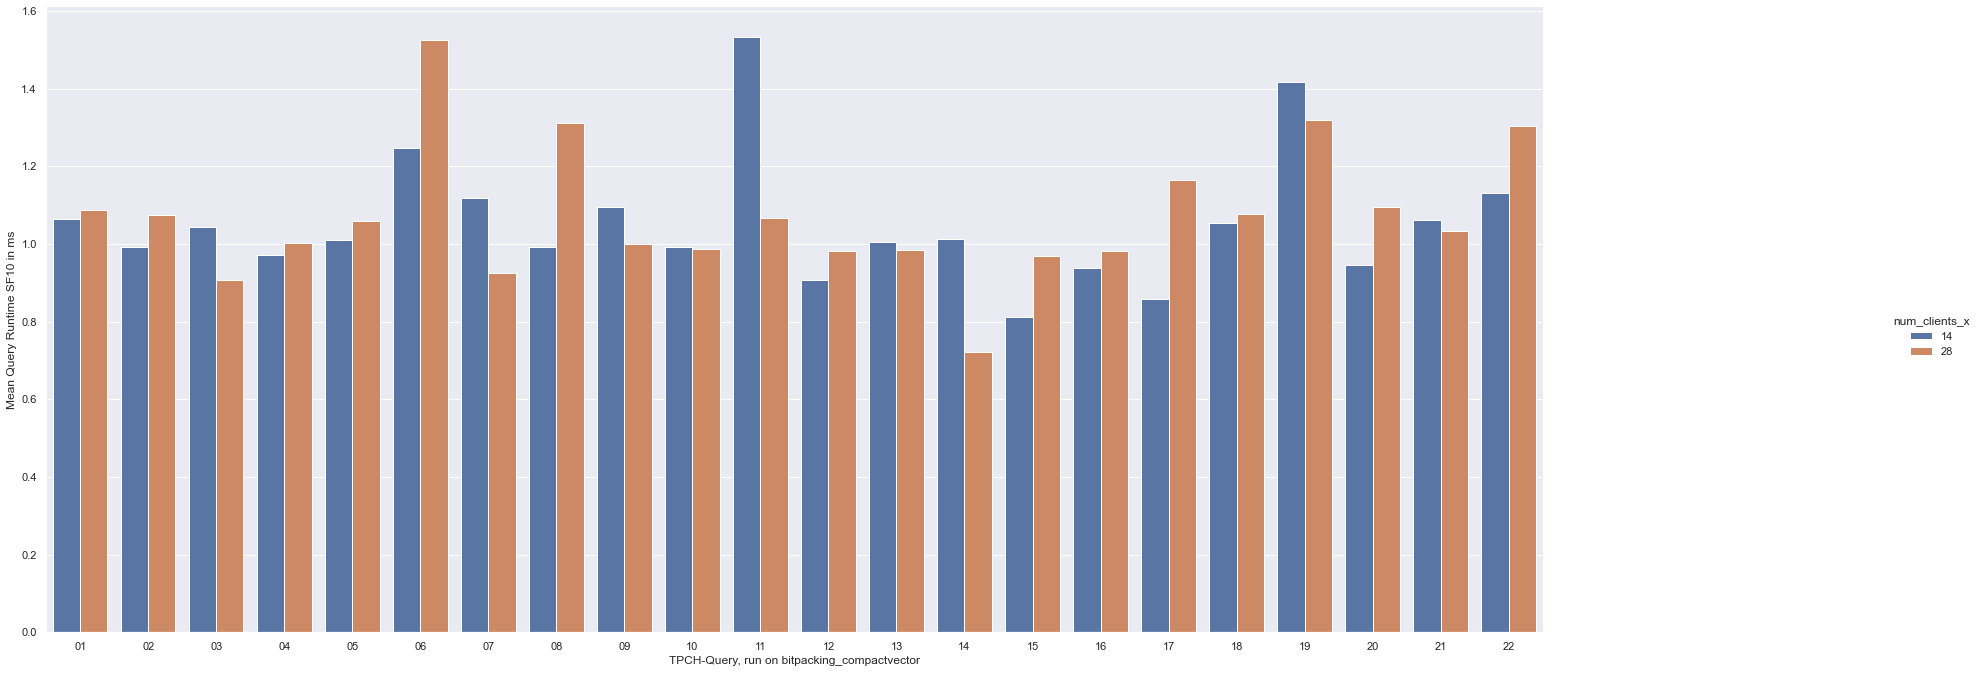

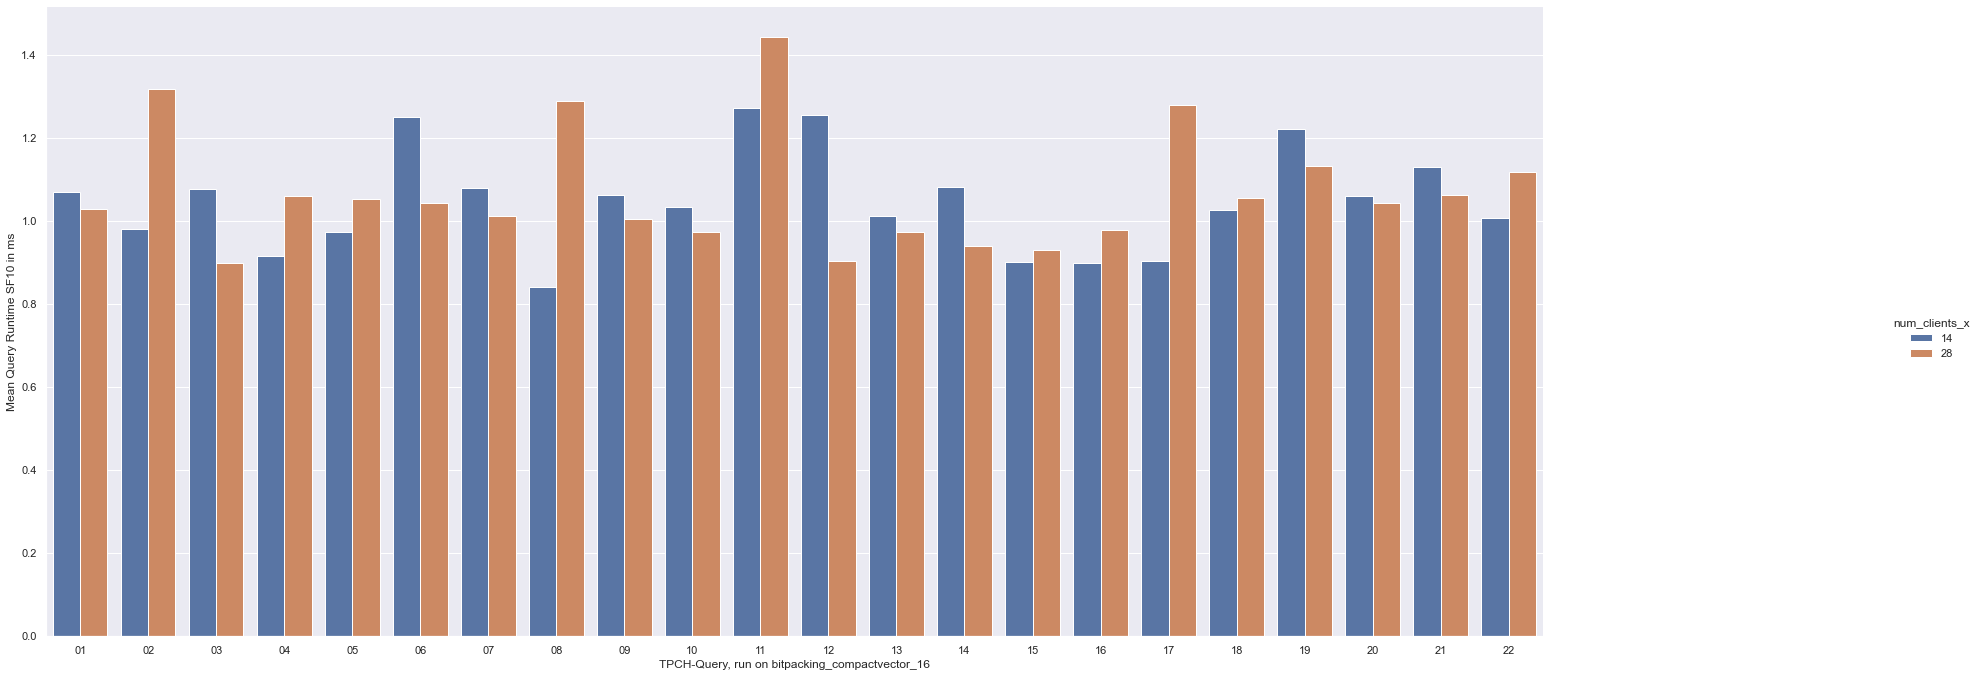

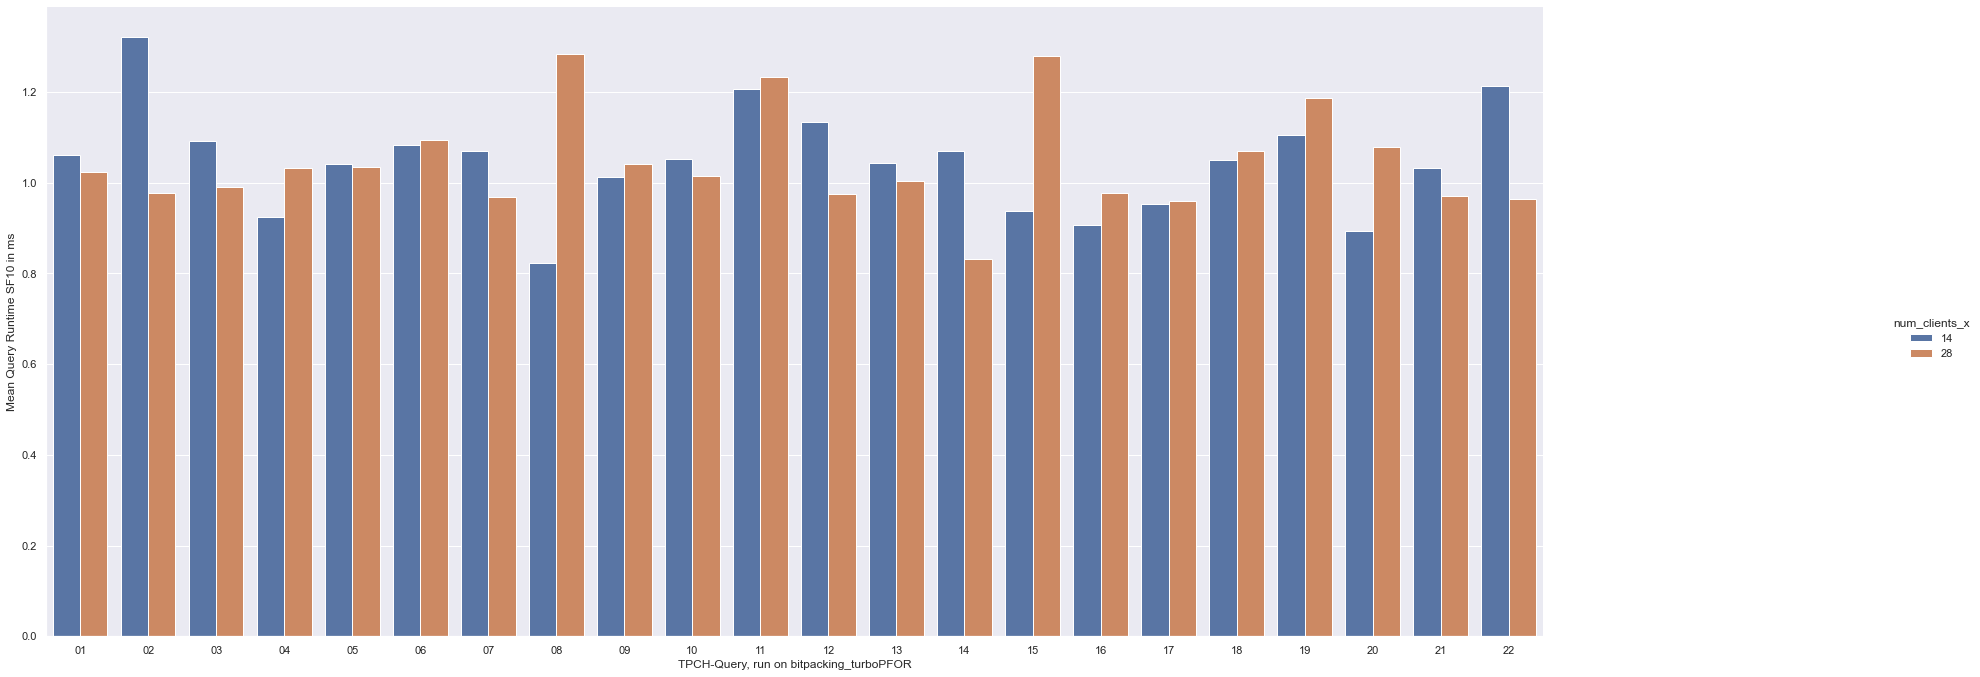

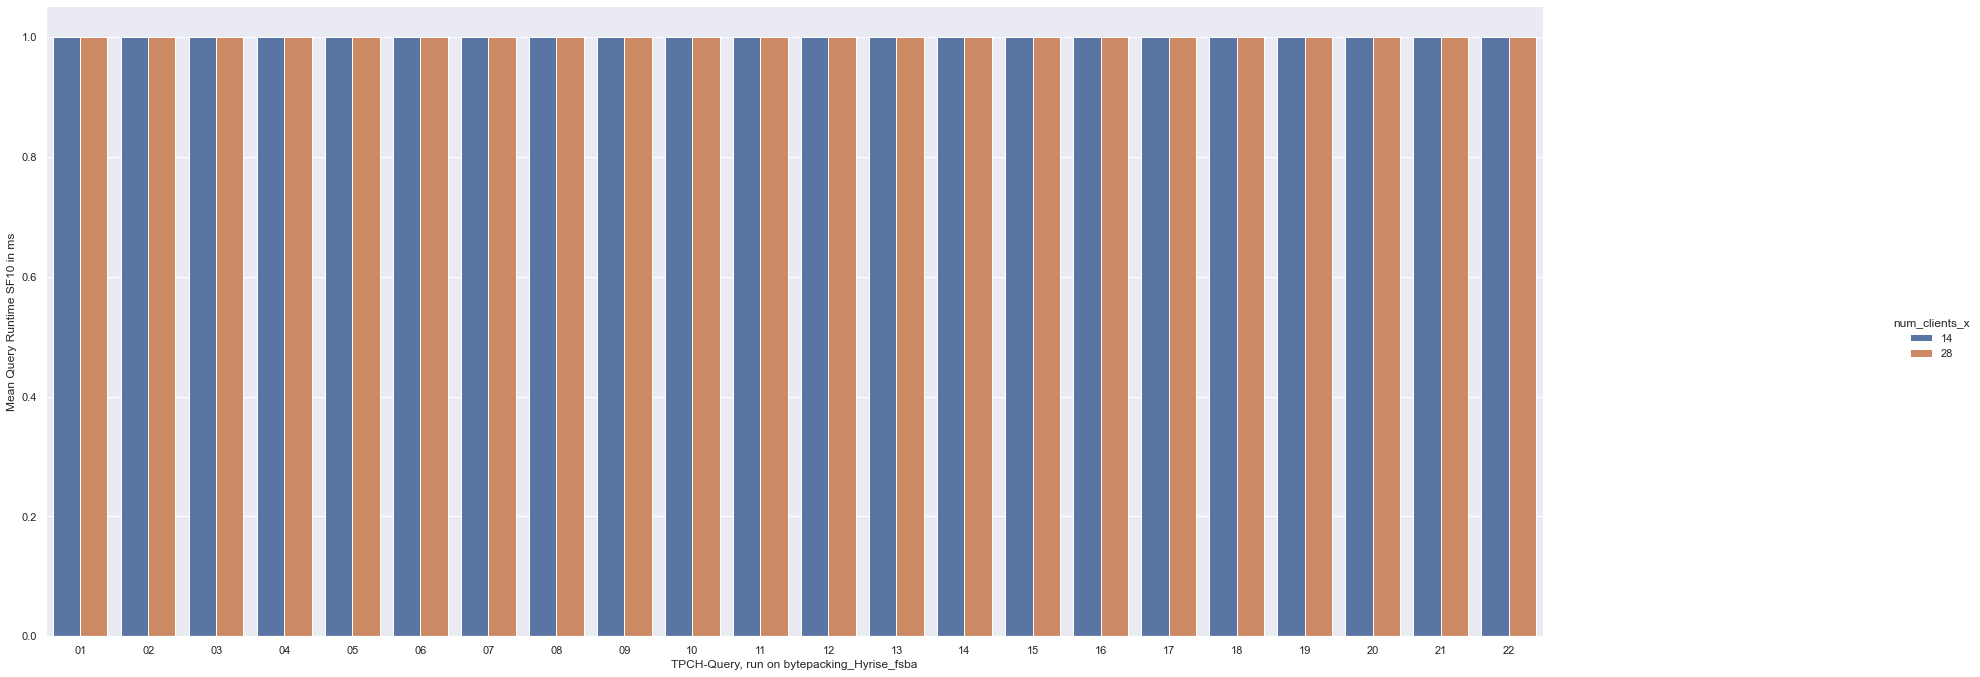

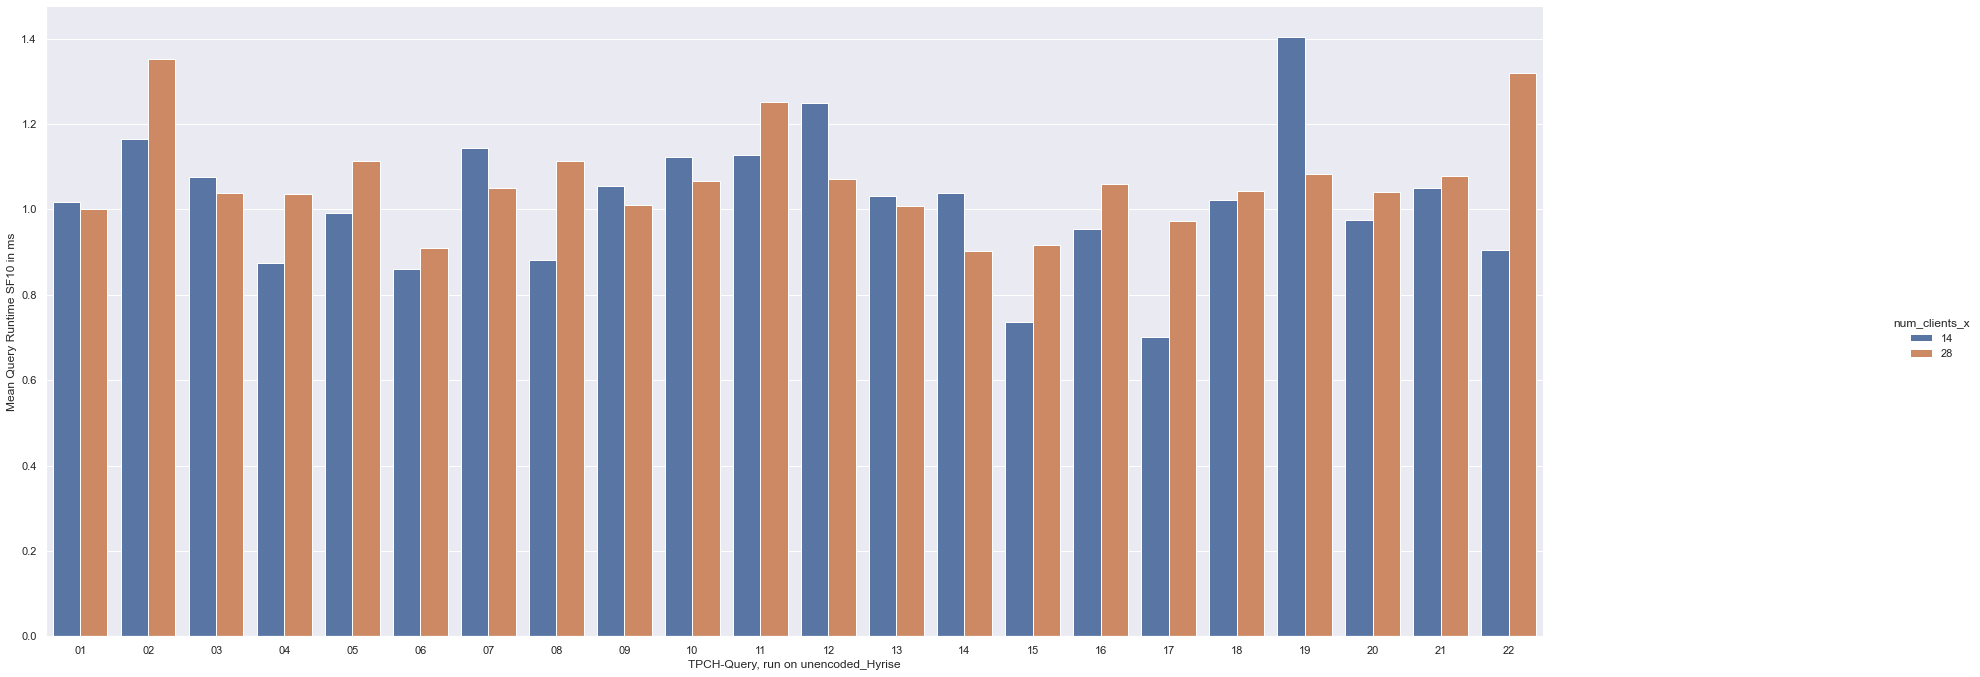

In [42]:
for n in codec_names:
    f = filtered[filtered["codec_name_x"].str.endswith(f"{n}")]
    plot = sns.catplot(data=f, x="query_name_x", y="duration_percentage", kind="bar", hue="num_clients_x")
    plot.set_axis_labels("TPCH-Query, run on " + n, "Mean Query Runtime SF10 in ms")
    plot.fig.set_size_inches(30,10)
    plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
    plt.show()

### weird, why are both of our schemes bitpacking_turbopfor and bitpacking_compactvector worde in queries 2, 17 and better in query 6? what is going on?

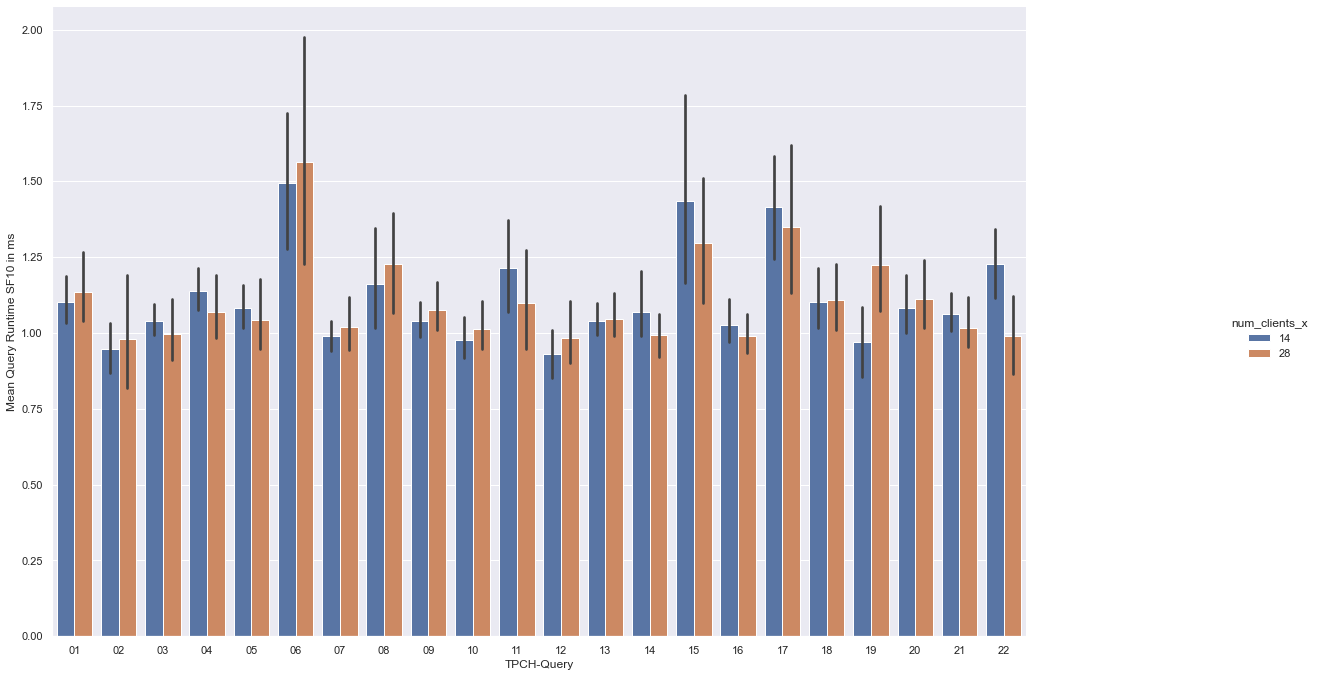

In [33]:

plot = sns.catplot(data=filtered, x="query_name_x", y="duration_percentage", kind="bar", hue="num_clients_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")